In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#explore the type of data in the Measurement sqlite file
first_row=session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1157f7978>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [11]:
#Use inspector to identify the variable types in the table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#explore the type of data in the Station sqlite file
first_row=session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x115835978>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0}

In [13]:
#Use inspector to identify the variable types in the table
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis - Precipitation Analysis


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


In [15]:
#find last data point in database
lastdate=session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
lastdate

('2017-08-23')

In [16]:
#query for 12 months from the last collected data point
lastdate_query=session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').all()

In [17]:
#check the queried data
print(type(lastdate_query))
print(lastdate_query[0])

<class 'list'>
('2016-08-23', 0.0)


In [18]:
#pull data in tuple into list through list comprehension
#to put into pandas dataframe
date=[query[0] for query in lastdate_query]

In [19]:
#pull data in tuple through list comprehension
#to put into pandas dataframe
prcp=[query[1] for query in lastdate_query]
print(type(prcp))

<class 'list'>


In [20]:
#store data into a dataframe
df=pd.DataFrame(list(zip(date,prcp)), columns=['date', 'prcp'])
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [21]:
#save dates for graphing later
dates=df['date']
dates.head()

0    2016-08-23
1    2016-08-24
2    2016-08-25
3    2016-08-26
4    2016-08-27
Name: date, dtype: object

In [22]:
# Sort the dataframe by date
df=df.sort_values(by=['date'], ascending=True)

df.head()

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


In [23]:
#drop NA data. Change in shape will indicate rows were dropped
#due to not having precipitation data
print(df.shape)
df=df.dropna()
print(df.shape)

(2230, 2)
(2021, 2)


In [24]:
#Plot the results using the DataFrame plot method.
import seaborn as sns

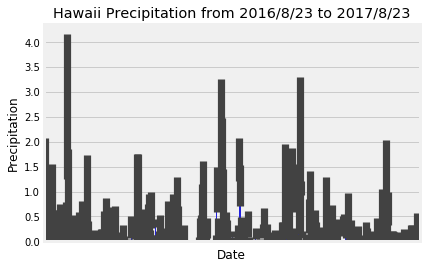

In [25]:
ax=sns.barplot(x='date', y='prcp', data=df, color='blue')
ax.set(xlabel='Date', ylabel='Precipitation', 
       title='Hawaii Precipitation from 2016/8/23 to 2017/8/23')
ax.axes.get_xaxis().set_ticklabels([])
plt.savefig('precipitation2016_2017.png')

In [26]:
#set date as index
df=df.set_index('date')
df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


In [27]:
#Use Pandas to print the summary statistics for the precipitation data.
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Climate Analysis - Station Analysis

In [28]:
# Design a query to show how many stations are available in this dataset?
uniquestations=session.query(Station.id).count()
print(f"Number of unique Hawaii stations is : {uniquestations}")

Number of unique Hawaii stations is : 9


In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activestations=session.query(Measurement.station, Measurement.tobs, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
activestations

[('USC00519281', 70.0, 2772),
 ('USC00519397', 65.0, 2724),
 ('USC00513117', 67.0, 2709),
 ('USC00519523', 75.0, 2669),
 ('USC00516128', 73.0, 2612),
 ('USC00514830', 67.0, 2202),
 ('USC00511918', 66.0, 1979),
 ('USC00517948', 75.0, 1372),
 ('USC00518838', 72.0, 511)]

In [30]:
print(f"Station with the most rows: {activestations[0][0]}")
print(f"Station with the second most rows: {activestations[1][0]}")
print(f"Station with the third most rows: {activestations[2][0]}")

Station with the most rows: USC00519281
Station with the second most rows: USC00519397
Station with the third most rows: USC00513117


In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
mintemp=session.query(Measurement.station, Measurement.tobs,\
    func.min(Measurement.tobs)).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == "USC00519281").all()

print(f"Minimum temperature from station: {mintemp[0][2]}")

Minimum temperature from station: 59.0


In [32]:
maxtemp=session.query(Measurement.station, Measurement.tobs,\
    func.max(Measurement.tobs)).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == "USC00519281").all()

print(f"Maximum temperature from station: {maxtemp[0][2]}")

Maximum temperature from station: 83.0


In [33]:
avgtemp=session.query(Measurement.station, Measurement.tobs,\
    func.avg(Measurement.tobs)).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == "USC00519281").all()

print(f"Average temperature from station: {avgtemp[0][2]}")

Average temperature from station: 73.10795454545455


In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stationUSC00519281=session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == "USC00519281").all()
stationUSC00519281

[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [35]:
#convert data into list so it may be graphed
stationtemp=[query[1] for query in stationUSC00519281]
print(type(stationtemp))

<class 'list'>


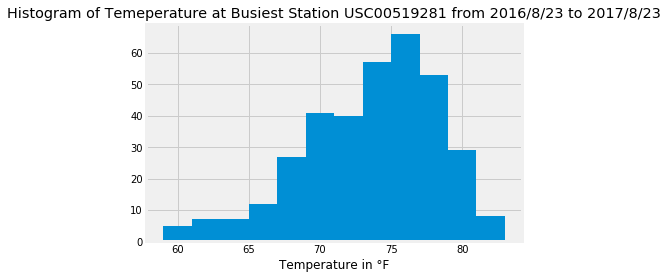

In [84]:
#plot the histogram with 12 bins
plt.hist(stationtemp, bins=12)
plt.title("Histogram of Temeperature at Busiest Station USC00519281 from 2016/8/23 to 2017/8/23", loc='center')
plt.xlabel("Temperature in °F")
plt.savefig('temps_histogram_2016_2017.png')


In [37]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [38]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date='2016-08-23'
end_date='2016-09-14'
trip_temps=calc_temps(start_date, end_date)
print(trip_temps)

[(71.0, 77.79310344827586, 84.0)]


In [64]:
tmax_tmin = (trip_temps[0][2]-trip_temps[0][0])
tmax_tmin

13.0

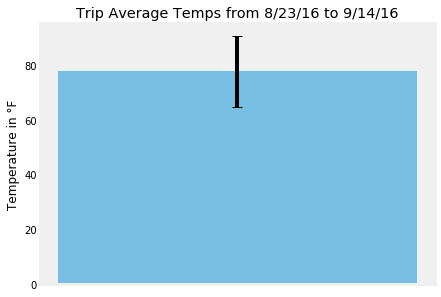

In [81]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar("", trip_temps[0][1], align='center',  yerr=tmax_tmin, 
        alpha=0.5, ecolor='black',capsize=5)
plt.grid(False)
plt.tight_layout()
plt.ylabel("Temperature in °F")
plt.title('Trip Average Temps from 8/23/16 to 9/14/16')
plt.savefig('trip_avg_temps_20160823_20160914.png')

In [96]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel=[Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
trip_prcp=session.query(*sel,  func.sum(Measurement.prcp)).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()
trip_prcp

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  22.95),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  9.509999999999998),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  5.47),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  5.119999999999999),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  5.109999999999999),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 1.8),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.06)]

## Optional Challenge Assignment

In [97]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [120]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

#Trip dates:
#start_date='2016-08-23'
#end_date='2016-09-14'

start_trip=daily_normals('08-23')
end_trip=daily_normals('09-14')
start_trip

[(67.0, 76.6923076923077, 87.0)]

In [104]:
# Use the start and end date to create a range of dates

#calculate the lenght of trip in terms of days
base=dt.datetime(2016,8,23)
delta = abs(dt.date(2016,8,23) - dt.date(2016,9,14))
triplength=delta.days
triplength

22

In [107]:
#take the day length of trip to find the range of dates with datetime, include start and end date
trip_range=[base + dt.timedelta(days=x) for x in range(triplength+1)]
trip_range

[datetime.datetime(2016, 8, 23, 0, 0),
 datetime.datetime(2016, 8, 24, 0, 0),
 datetime.datetime(2016, 8, 25, 0, 0),
 datetime.datetime(2016, 8, 26, 0, 0),
 datetime.datetime(2016, 8, 27, 0, 0),
 datetime.datetime(2016, 8, 28, 0, 0),
 datetime.datetime(2016, 8, 29, 0, 0),
 datetime.datetime(2016, 8, 30, 0, 0),
 datetime.datetime(2016, 8, 31, 0, 0),
 datetime.datetime(2016, 9, 1, 0, 0),
 datetime.datetime(2016, 9, 2, 0, 0),
 datetime.datetime(2016, 9, 3, 0, 0),
 datetime.datetime(2016, 9, 4, 0, 0),
 datetime.datetime(2016, 9, 5, 0, 0),
 datetime.datetime(2016, 9, 6, 0, 0),
 datetime.datetime(2016, 9, 7, 0, 0),
 datetime.datetime(2016, 9, 8, 0, 0),
 datetime.datetime(2016, 9, 9, 0, 0),
 datetime.datetime(2016, 9, 10, 0, 0),
 datetime.datetime(2016, 9, 11, 0, 0),
 datetime.datetime(2016, 9, 12, 0, 0),
 datetime.datetime(2016, 9, 13, 0, 0),
 datetime.datetime(2016, 9, 14, 0, 0)]

In [116]:
# Stip off the year and save a list of %m-%d strings
trip_range_md=[trip_range[x].strftime("%m-%d") for x in range(triplength+1)]
trip_range_md

['08-23',
 '08-24',
 '08-25',
 '08-26',
 '08-27',
 '08-28',
 '08-29',
 '08-30',
 '08-31',
 '09-01',
 '09-02',
 '09-03',
 '09-04',
 '09-05',
 '09-06',
 '09-07',
 '09-08',
 '09-09',
 '09-10',
 '09-11',
 '09-12',
 '09-13',
 '09-14']

In [141]:
trip_range_md[0]

'08-23'

In [156]:
# Loop through the list of %m-%d strings and calculate the normals for each date
tripnormals=[]
for x in range(triplength+1):
    date=trip_range_md[x]
    tripnormals.append(daily_normals(date))

tripnormals

[[(67.0, 76.6923076923077, 87.0)],
 [(70.0, 75.96153846153847, 84.0)],
 [(69.0, 76.96078431372548, 82.0)],
 [(71.0, 76.56862745098039, 84.0)],
 [(68.0, 76.28301886792453, 84.0)],
 [(67.0, 76.73469387755102, 86.0)],
 [(70.0, 76.23529411764706, 85.0)],
 [(68.0, 76.41666666666667, 84.0)],
 [(67.0, 76.84, 85.0)],
 [(69.0, 77.0, 82.0)],
 [(67.0, 76.66666666666667, 83.0)],
 [(69.0, 76.13725490196079, 83.0)],
 [(68.0, 76.27083333333333, 84.0)],
 [(66.0, 75.91489361702128, 84.0)],
 [(66.0, 74.91111111111111, 81.0)],
 [(64.0, 75.18, 82.0)],
 [(66.0, 76.22222222222223, 83.0)],
 [(68.0, 76.36538461538461, 84.0)],
 [(67.0, 76.61224489795919, 85.0)],
 [(70.0, 76.69565217391305, 83.0)],
 [(68.0, 75.89795918367346, 85.0)],
 [(68.0, 75.875, 82.0)],
 [(69.0, 75.98076923076923, 85.0)]]

In [170]:
# Load the previous query results into a Pandas DataFrame 
tmin=[x[0][0] for x in tripnormals]
tavg=[x[0][1] for x in tripnormals]
tmax=[x[0][2] for x in tripnormals]
data=list(zip(tmin, tavg,tmax, trip_range_md))
tripnormals_DF=pd.DataFrame(data, columns=['Tmin', 'Tavg','Tmax', 'Date'])
tripnormals_DF.head()

,Tmin,Tavg,Tmax,Date
0,67.0,76.692308,87.0,08-23
1,70.0,75.961538,84.0,08-24
2,69.0,76.960784,82.0,08-25
3,71.0,76.568627,84.0,08-26
4,68.0,76.283019,84.0,08-27


In [171]:
#and add the `trip_dates` range as the `date` index
tripnormals_DF=tripnormals_DF.set_index('Date')
tripnormals_DF.head()

,Tmin,Tavg,Tmax
Date,,,
08-23,67.0,76.692308,87.0
08-24,70.0,75.961538,84.0
08-25,69.0,76.960784,82.0
08-26,71.0,76.568627,84.0
08-27,68.0,76.283019,84.0


In [172]:
# Plot the daily normals as an area plot with `stacked=False`
import seaborn as sns

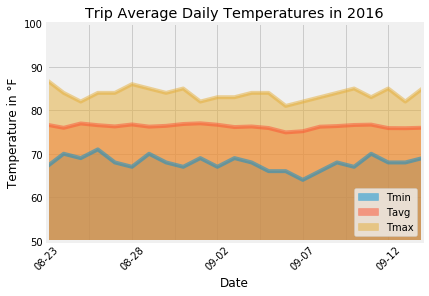

In [207]:

tripnormals_DF.plot(kind='area', stacked=False)
plt.legend(loc='lower right')
plt.title('Trip Average Daily Temperatures in 2016')
plt.ylabel("Temperature in °F")
plt.ylim(50, 100)
plt.xticks(rotation=45)
plt.savefig('Trip_Avg_Daily_temps.png')

# Optional Temperature Analysis I

In [220]:
#Hawaii is reputed to enjoy mild weather all year. 
#Is there a meaningful difference between the temperature in, for example, June and December?
#You may either use SQLAlchemy or pandas's read_csv() to perform this portion.

#Identify the average temp in June at all stations across all available years in the dataset.

june_tavg=session.query(func.avg(Measurement.tobs), Measurement.station).\
    filter(func.strftime("%m", Measurement.date) == '06').\
    group_by(Measurement.station).all()
june_tavg

[(74.13939393939394, 'USC00511918'),
 (74.05084745762711, 'USC00513117'),
 (76.00537634408602, 'USC00514830'),
 (71.9372197309417, 'USC00516128'),
 (76.6554054054054, 'USC00517948'),
 (73.39473684210526, 'USC00518838'),
 (73.27118644067797, 'USC00519281'),
 (77.55932203389831, 'USC00519397'),
 (76.66810344827586, 'USC00519523')]

In [221]:
#Do the same for December temperature.

dec_tavg=session.query(func.avg(Measurement.tobs), Measurement.station).\
    filter(func.strftime("%m", Measurement.date) == '12').\
    group_by(Measurement.station).all()
dec_tavg

[(69.6842105263158, 'USC00511918'),
 (71.06944444444444, 'USC00513117'),
 (73.2247191011236, 'USC00514830'),
 (69.29126213592232, 'USC00516128'),
 (71.8348623853211, 'USC00517948'),
 (72.42105263157895, 'USC00518838'),
 (69.90322580645162, 'USC00519281'),
 (71.10952380952381, 'USC00519397'),
 (72.43333333333334, 'USC00519523')]

In [218]:
#Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?
from scipy import stats

In [227]:
#use list comprehension to pull out range of average temperature at each station
#date=[query[0] for query in lastdate_query]
june_ttest=[query[0] for query in june_tavg]
dec_ttest=[query[0] for query in dec_tavg]

In [228]:
stats.ttest_ind(june_ttest, dec_ttest, equal_var=False)

Ttest_indResult(statistic=4.615865424404701, pvalue=0.0003657335214469917)

In [ ]:
#I will use an unpaired, 2-sample t-test because I'm comparing two differnet points in time.
#I'm not measuring the same population/test subjects. 

#the t-test results shows they are statistically different from one another 
#with a p-value < 0.05